# SEMANA 8 - Machine Learning - Classificação Supervisionado - valor (2,0 pontos)

Utilizando o banco de dados de Câncer da biblioteca do sklearn,
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))
print(cancer.data)

Realize os passos da aula passada e diga:
1-Acurácia Train entire model: KNN(1), KNN(5) e LogReg
2-Acurácia Train/Test Split : KNN(1), KNN(5) e LogReg
3-Gráfico de Tunning KNN(1-25)
4-Qual o melhor modelo com a melhor acurácia?


In [41]:
from sklearn.datasets import load_breast_cancer
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()

In [3]:
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print(cancer.data)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [9]:
X = cancer.data
y = cancer.target

In [10]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [36]:
#1-Acurácia Train entire model: KNN(1), KNN(5) e LogReg

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg.predict(X)
y_pred = logreg.predict(X)
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

1.0
0.9472759226713533
0.9595782073813708


C:\Users\julia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Reposta:

KNN(1) -> 100%
KNN(5) -> 94,73%
LogReg -> 95,96%


In [53]:
#2-Acurácia Train/Test Split : KNN(1), KNN(5) e LogReg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=5)

knm = KNeighborsClassifier(n_neighbors=1)
knm.fit(X_train, y_train)
y_pred = knm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

knm = KNeighborsClassifier(n_neighbors=5)
knm.fit(X_train, y_train)
y_pred = knm.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))



0.9263157894736842
0.9403508771929825
0.9614035087719298


C:\Users\julia\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Reposta:

KNN(1) -> 92,63%
KNN(5) -> 94,03%
LogReg -> 96,14%


In [46]:
#3-Gráfico de Tunning KNN(1-25)
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [47]:
print(scores)

[0.9263157894736842, 0.9122807017543859, 0.9263157894736842, 0.9263157894736842, 0.9403508771929825, 0.9438596491228071, 0.9578947368421052, 0.9649122807017544, 0.968421052631579, 0.9649122807017544, 0.968421052631579, 0.968421052631579, 0.9649122807017544, 0.9649122807017544, 0.9614035087719298, 0.9649122807017544, 0.9614035087719298, 0.9649122807017544, 0.9614035087719298, 0.9614035087719298, 0.9649122807017544, 0.9614035087719298, 0.9614035087719298, 0.9649122807017544, 0.9614035087719298]


Text(0, 0.5, 'Accuracy')

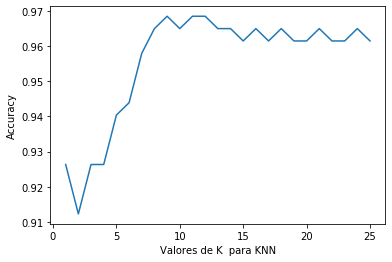

In [52]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel("Valores de K  para KNN")
plt.ylabel("Accuracy")

4-Qual o melhor modelo com a melhor acurácia?

O 3º método se mostrou o mais eficiente
